# Unsupervised_learning
Les 3 applications les plus importantes:
### Clustering
#### sklearn
#### Elbow Method
### Anomaly Detection (Isolation forest)
#### sklearn
#### Application digits
### Dimension Reduction
#### Visualisation de données
#### Compression de données


## Clustering : KMeans Clustering

Le clustering est un ensemble de techniques utilisées pour partitionner les données en groupes ou clusters.

La sélection d'un algorithme de clustering approprié pour votre ensemble de données est souvent difficile en raison du nombre de choix disponibles.

#### Utilisation de l'algorithme k-means
La méthode de clustering k-means est une technique d'apprentissage automatique non supervisée utilisée pour identifier des clusters d'objets de données dans un ensemble de données

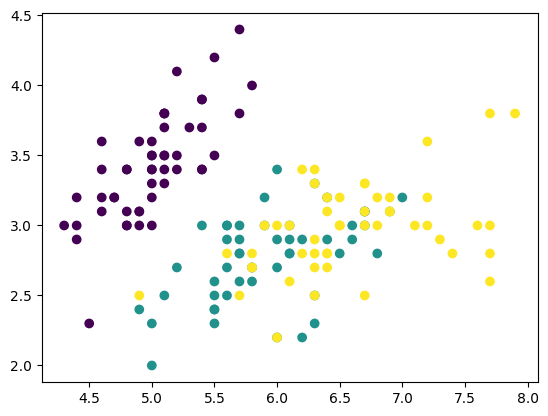

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#visualisation des données de la fleur d'iris sous forme de classification
iris = load_iris()
X = iris.data
y = iris.target
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [14]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


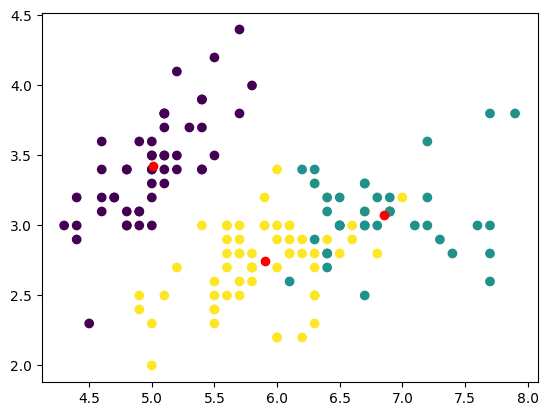

<bound method _BaseKMeans.score of KMeans(n_clusters=3)>

In [26]:
# Faire le clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)
plt.scatter(X[:,0],X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
plt.show()
model.inertia_

Comment être sur de trouver le bon nombre de clusters ?

#### ElbowMethode
Detecte une zone de coude dans la minimisation du coût

In [32]:
# Création de la méthode Elbow
inertia = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10).fit(X)
    inertia.append(model.inertia_)

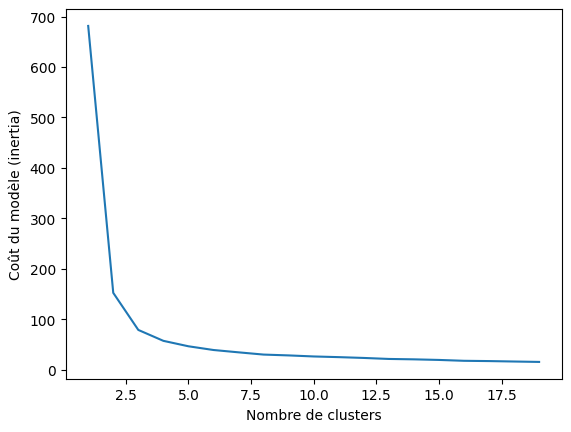

In [33]:
# Dectection du nombre de clusters grace à la zone de coude dans la minimisation du coût
plt.plot(k_range, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Coût du modèle (inertia)")
plt.show()

Nous pouvonsle min du coût dans la zone de coude par rapport au n clusters est 3

#### Isolation Forest :  Anomaly detection 
##### sklearn.ensemble

Isolation forest permet de detecter les anomalies dans notre data. Elle permet d'effectuer une série de split aléatoires et on compte le nombre de split qu'il faut pour isoler nos échantillon.

Plus le nombre de splits est petit plus il y a de forte chance que ça soit une anomalie

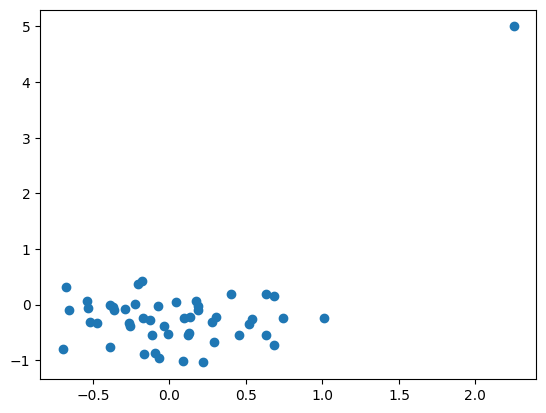

In [61]:
#création d'un data set avec anomalie
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=50, n_features=2, centers=1, cluster_std=0.4)
X[-1,:] = np.array([2.25, 5])
plt.scatter(X[:, 0], X[:, 1])
plt.show()


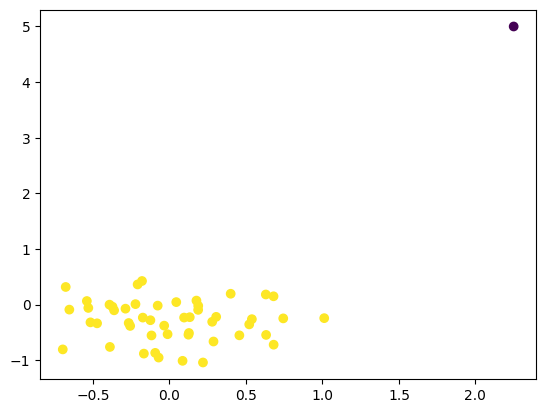

In [63]:
# Dettection de l'anomalie avec IsolationForest

from sklearn.ensemble import IsolationForest

model =  IsolationForest(contamination=0.01)
model.fit(X)
plt.scatter(X[:, 0], X[:, 1], c= model.predict(X))
plt.show()

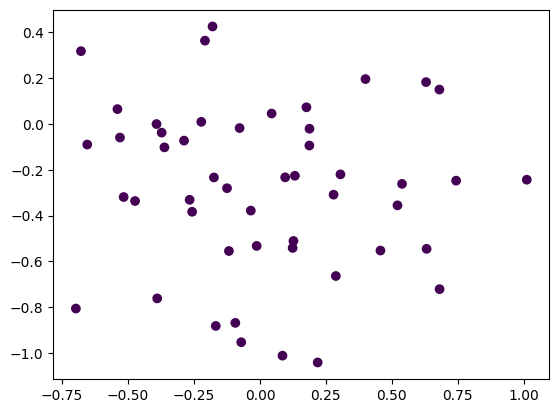

In [65]:
# Elimination de l'anomalie
model.predict(X)
X = X[model.predict(X) > -1]
plt.scatter(X[:, 0], X[:, 1], c= model.predict(X))
plt.show()

#### Application Décontamination Digits

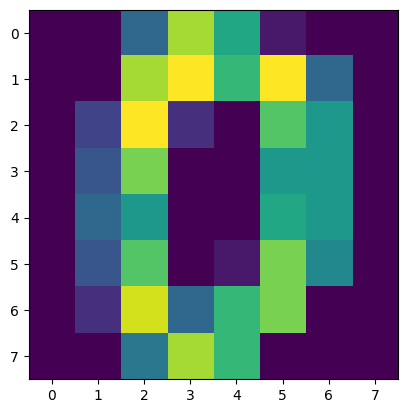

In [66]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])

In [75]:
# Création du modèle de détection d'anomalie
model = IsolationForest(contamination=0.02)
model.fit(X)
model.predict(X)
outliers = model.predict(X) == -1
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

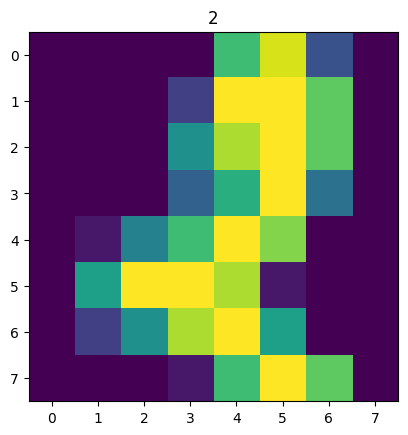

In [77]:
#affichage d'un outlier en image
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

On voit qu'il y a une anomalie dans la réprésentation de 2

### PCA : Reduction de dimension

##### sklearn.decompostion

Le principe est de réduire la complexité superflue de notre dataset en projetant ses données dans un espace plus petite dimension (un espace avec moins de variables)

Le but :<br>
Accélérer l'apprentissage de la machine.<br>
Lutter contre le fléau de la dimension (risque d'overfiting lié au surplus de dimension )

L'algorithme le plus populaire: Analyse en composantes Principales

Le principe est de projeter nos données sur des axes appelés composantes principales, en cherchant à minimiser la distance entre nos points et leurs projections

PCA est un transformer
<br>Définir le nombre de composants
<br>Transformer les données avec fit_transform()

#### Comment choisir le nombre de composants ?
Il y a 2 cas:
<br> 1er cas : lorsqu'on cherche à visualiser nos données dans un espace 2D ou 3D ainsi le nombre de composants va être 2 ou 3
<br> 2ème cas : Lorsqu'on cherche à compresser nos données pour accélérer l'apprentissage en conservant 95% à 99% de la variance de nos données

### Visualisation de données